In [1]:
import pandas as pd

# Load your dataset (change path if needed)
df = pd.read_csv('netflix_titles.csv')

# Check initial few rows (optional)
print("Before cleaning:\n", df['date_added'].head())

# Step 1: Strip leading/trailing whitespaces from date column
df['date_added'] = df['date_added'].astype(str).str.strip()

# Step 2: Try parsing using strict format
try:
    df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='raise')
except ValueError as e:
    print("Strict parsing failed. Falling back to more flexible parsing.")
    # Step 3: Fallback to more flexible parsing if error
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 4 (Optional): Check if any rows failed to parse
bad_dates = df[df['date_added'].isna()]
if not bad_dates.empty:
    print("\n⚠️ Some dates could not be parsed. Showing unparsed rows:")
    print(bad_dates[['title', 'date_added']])

# Check after cleaning (optional)
print("\nAfter cleaning:\n", df['date_added'].head())


FileNotFoundError: [Errno 2] No such file or directory: 'netflix_titles.csv'

In [2]:
import pandas as pd

# Load your dataset (change path if needed)
df = pd.read_csv('netflix_titles.csv')

# Check initial few rows (optional)
print("Before cleaning:\n", df['date_added'].head())

# Step 1: Strip leading/trailing whitespaces from date column
df['date_added'] = df['date_added'].astype(str).str.strip()

# Step 2: Try parsing using strict format
try:
    df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='raise')
except ValueError as e:
    print("Strict parsing failed. Falling back to more flexible parsing.")
    # Step 3: Fallback to more flexible parsing if error
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 4 (Optional): Check if any rows failed to parse
bad_dates = df[df['date_added'].isna()]
if not bad_dates.empty:
    print("\n⚠️ Some dates could not be parsed. Showing unparsed rows:")
    print(bad_dates[['title', 'date_added']])

# Check after cleaning (optional)
print("\nAfter cleaning:\n", df['date_added'].head())


Before cleaning:
 0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

⚠️ Some dates could not be parsed. Showing unparsed rows:
                                            title date_added
6066  A Young Doctor's Notebook and Other Stories        NaT
6174              Anthony Bourdain: Parts Unknown        NaT
6795                                      Frasier        NaT
6806                                      Friends        NaT
6901                              Gunslinger Girl        NaT
7196                                     Kikoriki        NaT
7254                          La Familia P. Luche        NaT
7406                                        Maron        NaT
7847                                 Red vs. Blue        NaT
8182                 The Adventures of Figaro Pho        NaT

After cleaning:
 0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: d


🔍 Null values in dataset:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


/tmp/ipython-input-3-210417850.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


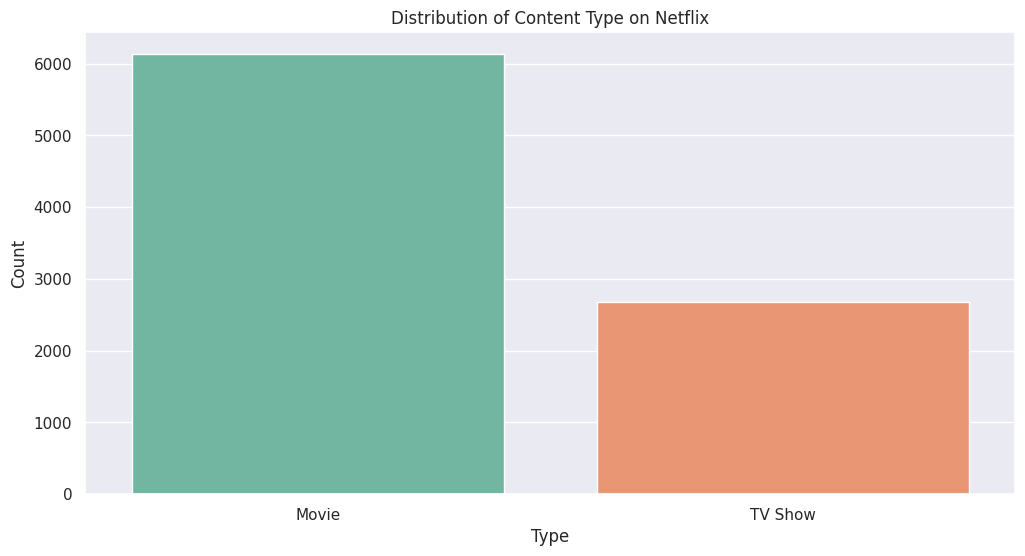

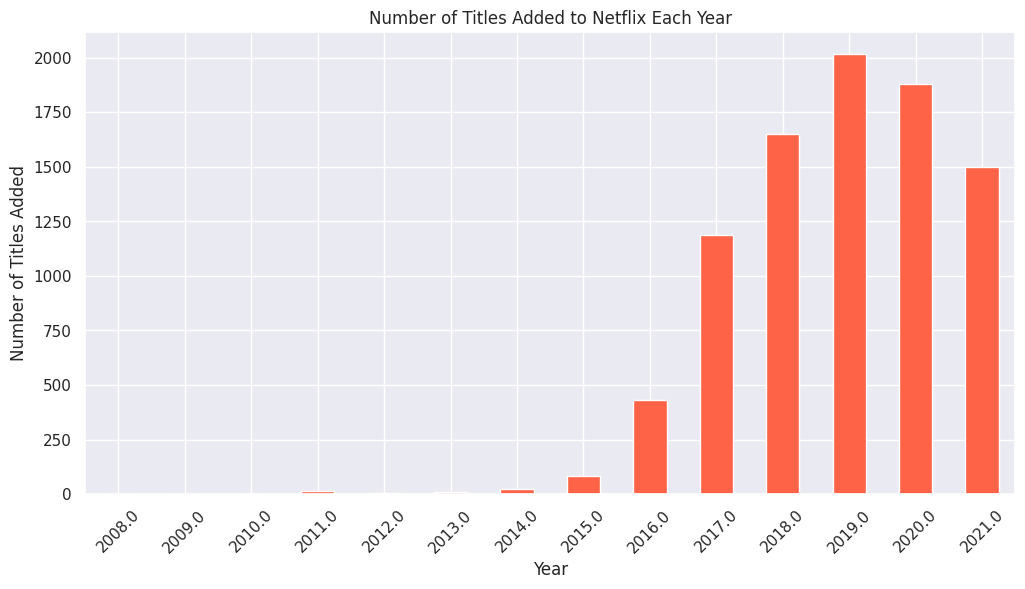

/tmp/ipython-input-3-210417850.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


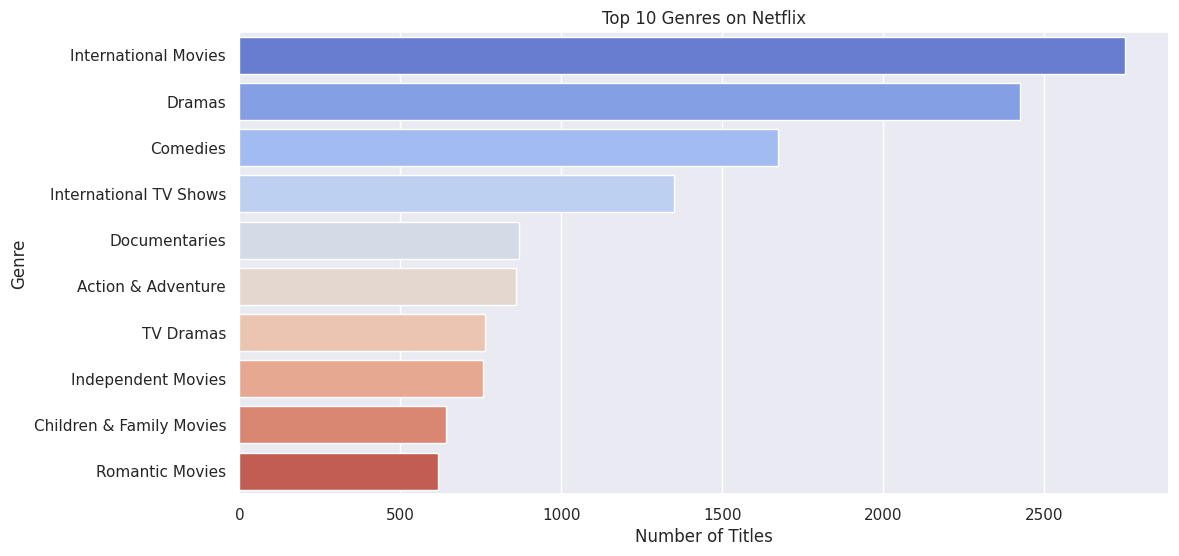

/tmp/ipython-input-3-210417850.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')


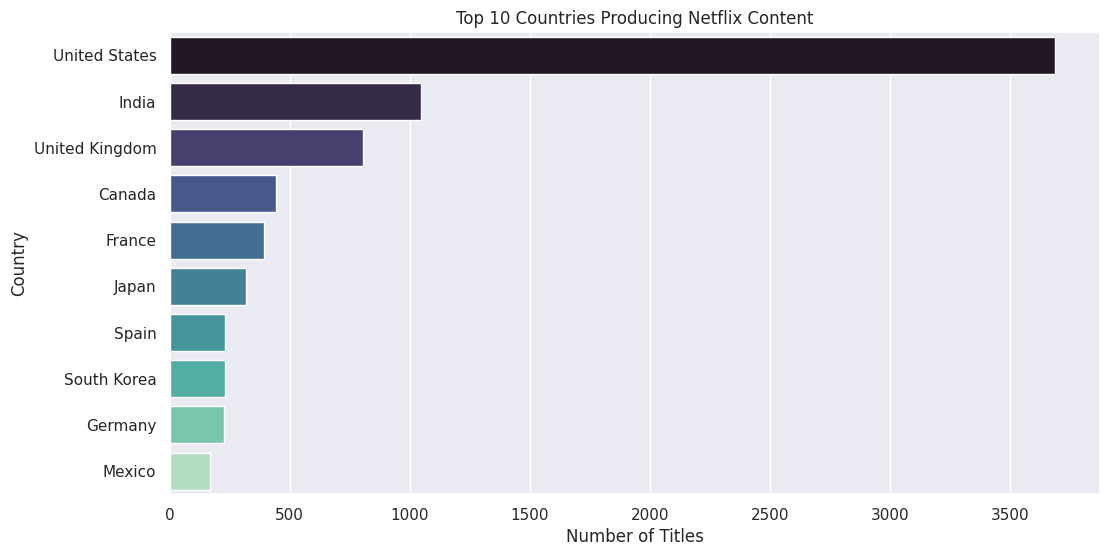

/tmp/ipython-input-3-210417850.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='Set3')


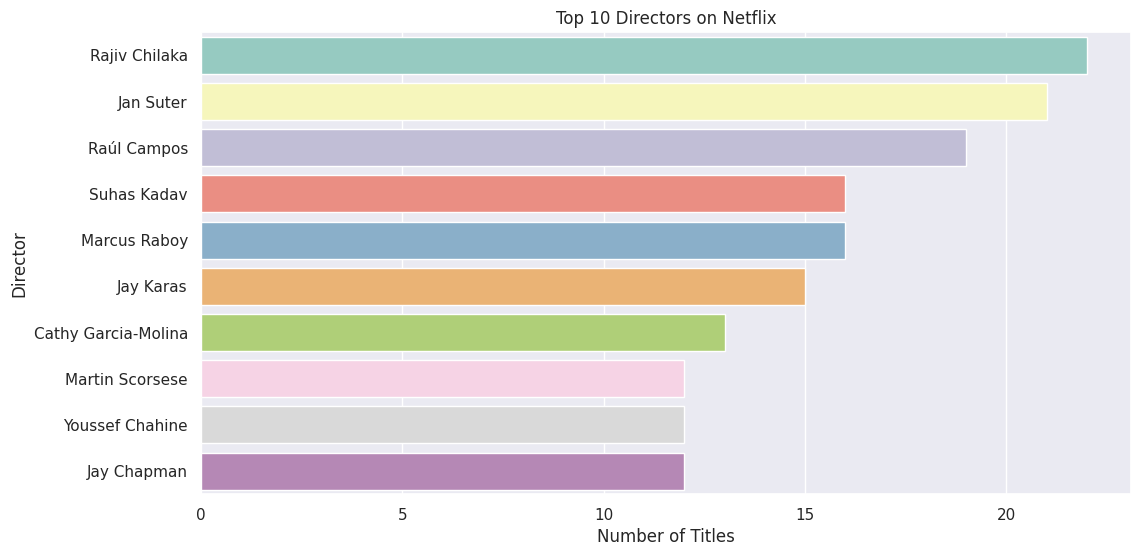

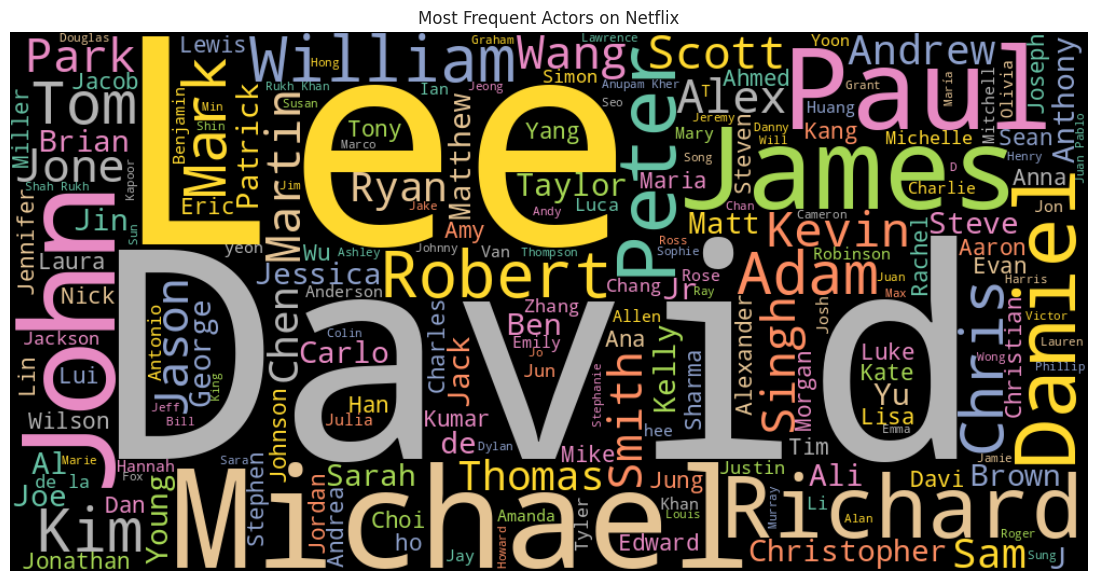

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# 🧹 Clean all string columns (remove leading/trailing spaces)
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# 🧹 Parse 'date_added' with fallback
df['date_added'] = df['date_added'].astype(str).str.strip()
try:
    df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='raise')
except ValueError:
    print("Strict date parsing failed. Using flexible parsing...")
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 🔍 Check nulls
print("\n🔍 Null values in dataset:\n")
print(df.isnull().sum())

# 🎬 Clean up titles
df = df[~(df['title'].isnull() | (df['title'].str.strip() == ""))]
df.reset_index(drop=True, inplace=True)

# ✨ Feature Engineering
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['year'] = pd.to_numeric(df['release_year'], errors='coerce')

# ============================
# 📊 VISUALIZATIONS
# ============================

# 1️⃣ Type Distribution (Movie vs TV Show)
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2️⃣ Content Added Over the Years
yearly_added = df['year_added'].value_counts().sort_index()
yearly_added.plot(kind='bar', color='tomato')
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Top 10 Genres (from 'listed_in')
top_genres = df['listed_in'].dropna().str.split(', ')
genre_series = top_genres.explode()
genre_counts = genre_series.value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# 4️⃣ Top 10 Countries Producing Netflix Content
country_series = df['country'].dropna().str.split(', ')
country_counts = country_series.explode().value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 5️⃣ Most Frequent Directors (Top 10)
top_directors = df['director'].dropna().str.split(', ')
director_series = top_directors.explode()
director_counts = director_series.value_counts().head(10)
sns.barplot(x=director_counts.values, y=director_counts.index, palette='Set3')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# 6️⃣ Most Frequent Actors (Top 20 WordCloud)
actor_series = df['cast'].dropna().str.split(', ')
actors_flat = actor_series.explode()
actor_counts = actors_flat.value_counts().head(20)

# WordCloud for top 100 actors
all_actors_text = ' '.join(actors_flat.dropna().tolist())
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set2').generate(all_actors_text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Actors on Netflix')
plt.show()
